In [10]:
import scipy as sp
import numpy as np
import qibo
from qibo.symbols import *
from qibo import hamiltonians
import matplotlib.pyplot as plt
from tqdm import tqdm

from functions import *

In [2]:
def optimalEnergyStep(H,  state):
    """
    Optimal step size at an iteration for minimizing the energy.
    """
    V = variance(H, state)
    S = skewness(H, V, state)
    # alpha = np.arccos(1/(np.sqrt(1+0.25*S**2)))
    # sOpt = (np.pi-2*alpha)/(4*np.sqrt(V))
    alpha = np.arctan(-2/S)
    if alpha > 0:
        alpha = -np.pi + alpha

    sOpt = -alpha/(2*np.sqrt(V))

    return sOpt

[Qibo 0.2.16|WARNING|2025-06-02 11:12:37]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


Optimal step: (0.6746219470804261-0j)


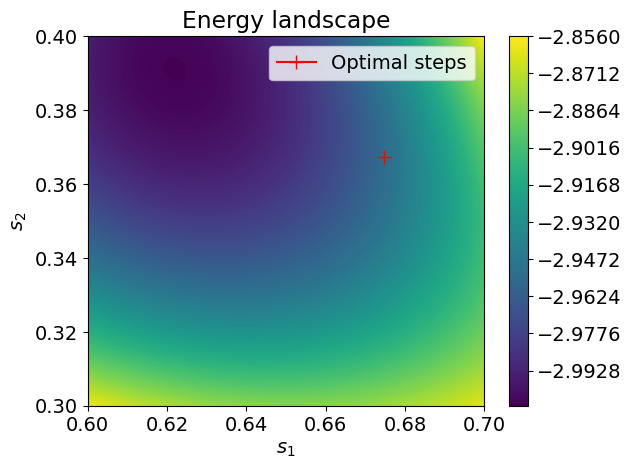

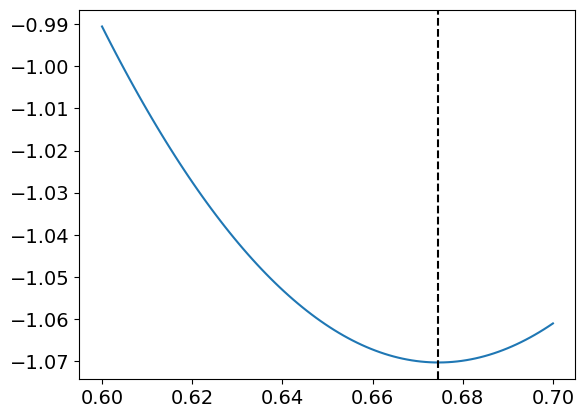

In [9]:
nqubits = 4
plt.rcParams.update({'font.size': 14})

H_def = sum([Z(x)*Z(x+1) -X(x)  for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
initState = np.zeros(2**nqubits)
initState[0] = 1
# initState= np.random.rand(2**nqubits)
# initState = initState/np.linalg.norm(initState)

s = np.linspace(0.6, 0.7, 100)
s2 = np.linspace(0.3, 0.4, 100)
sOptim = optimalEnergyStep(H,initState)
print("Optimal step:", sOptim)
state = DBI(1, H, sOptim, initState)[-1,:]
sOptim2 = optimalEnergyStep(H, state)

energyVal = np.zeros((len(s), len(s2)))
energySingle = np.zeros(len(s))
for i in range(len(s)):
    for j in range(len(s2)):
        state = DBI(1, H, s[i], initState)[-1,:]
        energySingle[i] = energy(H, state)
        state = DBI(1, H, s2[j], state)[-1,:]
        energyVal[i,j] = energy(H, state)

plt.figure()
plt.contourf(s, s2, energyVal.T, levels=200)
plt.colorbar()
plt.plot(sOptim, sOptim2, marker='+', color='red', markersize=10, label='Optimal steps')
plt.legend()
plt.xlabel(r'$s_1$')
plt.ylabel(r'$s_2$')
plt.title('Energy landscape')

plt.figure()
plt.plot(s, energySingle, label='Energy')
plt.axvline(sOptim, color='k', linestyle='--', label='optimal step')


[Qibo 0.2.16|WARNING|2025-06-03 10:52:26]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
C:\Users\andre\AppData\Local\Temp\ipykernel_27016\3517460500.py:9: RuntimeWarning: logm result may be inaccurate, approximate err = 9.649865553692925e-13
  Happ = sp.linalg.logm(H)


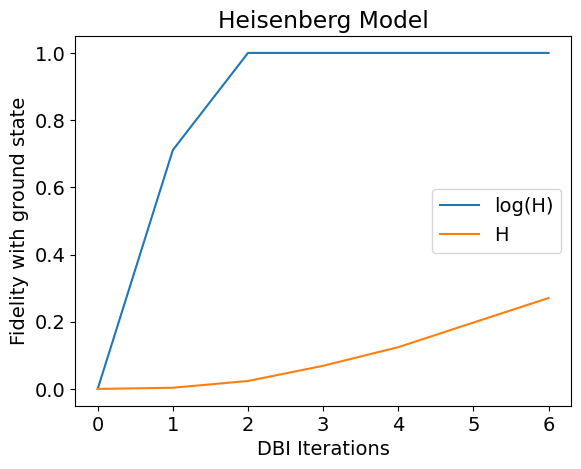

In [15]:

nqubits = [10]
plt.figure()
plt.title('Heisenberg Model')
for i in range(len(nqubits)):
    H_def = sum([Z(x)*Z(x+1) + X(x)*X(x+1) + Y(x)*Y(x+1)  for x in range(nqubits[i]-1)])
    H = hamiltonians.SymbolicHamiltonian(H_def).matrix
    E0 = np.linalg.eigh(H)[0][0]
    H += np.abs(E0)*np.eye(2**nqubits[i])
    Happ = sp.linalg.logm(H)
    refState = np.linalg.eigh(H)[1][:,0]
    initState = np.random.random(2**nqubits[i]) + 1j*np.random.random(2**nqubits[i])
    initState /= np.linalg.norm(initState)
    flog, _ , stepsE, energyE = optimalDBI(Happ, initState, refState, "DBI", "Energy", 6)
    fEnergy, _, state, stepsEnergy = optimalDBI(H, initState, refState, "DBI", "Energy", 6)
    plt.plot(flog, label = "log(H)")
    plt.plot(fEnergy, label = "H")

plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with ground state')
plt.legend()
plt.show()

[Qibo 0.2.16|WARNING|2025-05-27 12:35:37]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


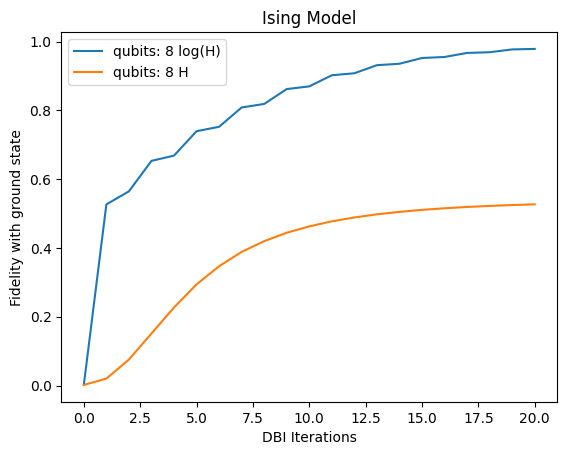

In [16]:

nqubits = [8]
plt.figure()
plt.title('Ising Model')
iters = 20
for i in range(len(nqubits)):
    H_def = sum([-Z(x)*Z(x+1) + X(x)  for x in range(nqubits[i]-1)])
    H = hamiltonians.SymbolicHamiltonian(H_def).matrix
    E0 = np.linalg.eigh(H)[0][0]
    H += np.abs(E0)*np.eye(2**nqubits[i])
    Happ = sp.linalg.logm(H)
    refState = np.linalg.eigh(H)[1][:,0]
    initState = np.random.random(2**nqubits[i]) + 1j*np.random.random(2**nqubits[i])
    initState /= np.linalg.norm(initState)
    flog, state, stepsEnergy = optimalDBI(Happ, initState, refState, "DBI", "Energy", iters)
    fEnergy, state, stepsEnergy = optimalDBI(H, initState, refState, "DBI", "Energy", iters)
    plt.plot(flog, label = "qubits: " + str(nqubits[i]) + " log(H)")
    plt.plot(fEnergy, label = "qubits: " + str(nqubits[i]) + " H")

plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with ground state')
plt.legend()
plt.show()

[Qibo 0.2.16|WARNING|2025-05-27 12:36:03]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


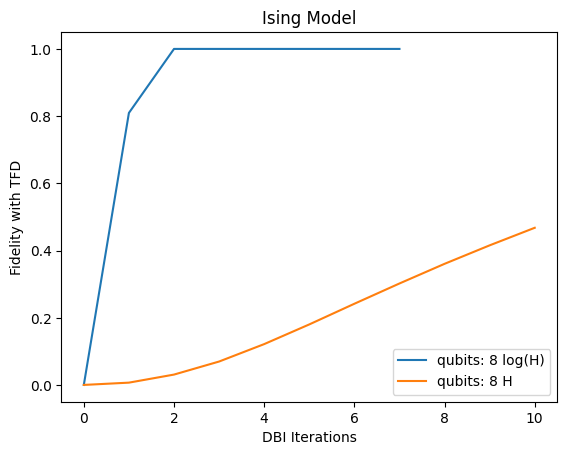

In [23]:

nqubits = [8]
plt.figure()
plt.title('Ising Model')
for i in range(len(nqubits)):
    H_def = sum([X(x+1)*X(x)+Y(x+1)*Y(x)  for x in range(nqubits[i]-1)])
    H = hamiltonians.SymbolicHamiltonian(H_def).matrix
    E0 = np.linalg.eigh(H)[0][0]
    H += np.abs(E0)*np.eye(2**nqubits[i])
    Happ = sp.linalg.logm(H)
    refState = np.linalg.eigh(H)[1][:,0]
    initState = np.random.random(2**nqubits[i]) + 1j*np.random.random(2**nqubits[i])
    initState /= np.linalg.norm(initState)
    flog, state, stepsEnergy = optimalDBI(Happ, initState, refState, "DBI", "Energy", 10)
    fEnergy, state, stepsEnergy = optimalDBI(H, initState, refState, "DBI", "Energy", 10)
    plt.plot(flog, label = "qubits: " + str(nqubits[i]) + " log(H)")
    plt.plot(fEnergy, label = "qubits: " + str(nqubits[i]) + " H")

plt.xlabel('DBI Iterations')
plt.ylabel('Fidelity with TFD')
plt.legend()
plt.show()